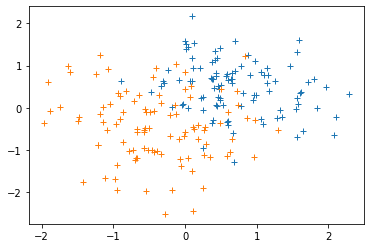

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

u1 = np.array([0.5,0.5])
conv1 = np.eye(2)/2
u2 = np.array([-0.5,-0.5])
conv2 = np.eye(2)/2

x1 = np.array(np.random.multivariate_normal(mean=u1,cov=conv1,size=100))
samp1, natt1 = x1.shape
a = np.ones(samp1)
x1 = np.insert(x1, natt1, values=a, axis=1)
plt.plot(x1[:,0],x1[:,1],'+')

x2 = np.array(np.random.multivariate_normal(mean=u2,cov=conv2,size=100))
samp2, natt2 = x2.shape
b = np.zeros(samp2)
x2 = np.insert(x2, natt2, values=b, axis=1)

x = np.vstack((x1,x2))
X = x[:,0:2]
samp3, natt3 = X.shape
c = np.ones(samp3)
#X = np.insert(X, 0, values=c, axis=1)
y = x[:,2:]
plt.plot(x2[:,0],x2[:,1],'+')
plt.show()

In [0]:
class Perceptron():

    def __init__(self):
        pass
  

    def train(self, X, y, learning_rate=1, n_iters=100):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        self.weights = np.zeros((n_features,1))
        self.bias = 0
        self.loss = np.zeros(n_iters)
       

        for i in range(n_iters):


            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias

            # Step 2: Compute the output
            y_predict = self.step_function(a)

            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b
            
           # self.loss[i] = -np.sum(np.dot(y_predict,(np.dot(X,self.weights)+self.bias)))
            self.loss[i] = -np.sum(np.dot(y_predict.T,(np.dot(X,self.weights)+self.bias)))
          

        return self.weights, self.bias, self.loss

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)


    

In [0]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from matplotlib.colors import ListedColormap


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:

p = Perceptron()
w_trained, b_trained,loss_trained = p.train(X_train, Y_train,learning_rate=1, n_iters=100)


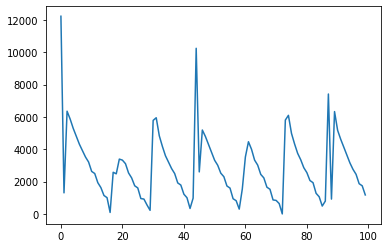

In [105]:
loss = []
for i in loss_trained:
    i = abs(i)
    loss.append(i)  
#for j in loss:
#  print(j)
index = np.arange(len(loss))
plt.plot(index,loss)
  

In [91]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)


print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - Y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - Y_test)) * 100}%")


training accuracy: 85.625%
test accuracy: 87.5%


In [0]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-1,1,200)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.scatter(X[:,0], X[:,1], marker='+',c=y)
    
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset decision boundary")

    plt.show()


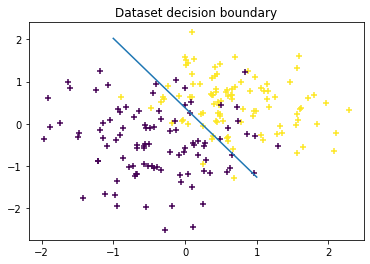

In [100]:
plot_hyperplane(X, y, w_trained, b_trained)